<a href="https://colab.research.google.com/github/Monica132-a/Agriculture-Vision/blob/master/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
non-resource variables are not supported in the long term
No of training (X):(4, 150)
No of training (X):(3, 150)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



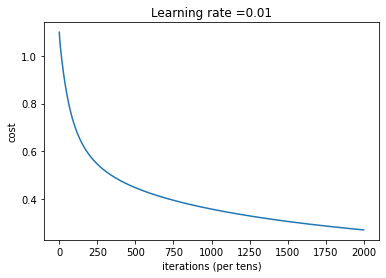

the Accuracy is :0.94


In [ ]:


import pandas as pd
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import normalize
from subprocess import check_output

# Open the file for reading...
df = pd.read_csv('Iris.csv')
df.head()
df = df.drop(['Id'],axis=1)
df.isnull().sum()
df["Species"] = df["Species"].map({
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}).astype(int)
x_train = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train = df['Species']
new_y = []
for i in y_train:
    a = [0,0,0]
    a[i] = 1
    new_y.append(a)   
    
columns = list(x_train)
X = pd.DataFrame(x_train,columns=columns).values
Y = np.array(new_y)
#flatten the features for feeding into network base layer

X_train_flatten = X.reshape(X.shape[0],-1).T
Y_train_flatten = Y.reshape(Y.shape[0],-1).T
print("No of training (X):"+str(X_train_flatten.shape))
print("No of training (X):"+str(Y_train_flatten.shape))

XX_train_flatten = normalize(X_train_flatten)
YY_train_flatten = normalize(Y_train_flatten)
# creating the placeholders for X & Y 
def create_placeholders(n_x,n_y):
    
    X = tf.placeholder(shape=[n_x,None],dtype=tf.float32)
    Y = tf.placeholder(shape=[n_y,None],dtype=tf.float32)
    
    return X,Y
#initialize paramete 
def initialize_parameters():
    
    W1 = tf.get_variable("W1",[3,4],initializer = tf.zeros_initializer())#tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1",[3,1],initializer = tf.zeros_initializer())

    
    parameters = {"W1":W1,
                  "b1":b1}
                  
    return parameters
#forward propogation
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']

    Z1 = tf.add(tf.matmul(W1,X),b1)

    return Z1
# compute function 
def compute_cost(Z1,Y):
    
    logits = tf.transpose(Z1)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost
# Running the NN !! 
tf.compat.v1.reset_default_graph()
(n_x, m) = X_train_flatten.shape       # shape of X                    
n_y = Y_train_flatten.shape[0]         # shape of Y
X, Y = create_placeholders(n_x,n_y)    # creating placeholder 
tf.set_random_seed(42)
p = initialize_parameters()            # initialize parameter 
Z6 = forward_propagation(X,p)          # forward prop
y_softmax = tf.nn.softmax(Z6)          # softmax function 
cost = compute_cost(Z6,Y)              # cost function 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.01).minimize(cost)  # gradient descent, backprop, update,optimiz
sess = tf.Session()
sess.run(tf.global_variables_initializer())    #initializae 
par = sess.run(p)
Y_pred = sess.run(Z6,feed_dict={X:X_train_flatten})    #forward prop test 
cost_value = sess.run(cost,feed_dict={Z6:Y_pred,Y:Y_train_flatten})  #cost function test - First cost function 
costs =[]
for i in range(0,2000):                # 2000 epoch !! 
    _,new_cost_value = sess.run([optimizer, cost], feed_dict={X: X_train_flatten, Y: Y_train_flatten})
    costs.append(new_cost_value)

p = sess.run(p)                        # parameter saving 
y_softmax = sess.run(y_softmax,feed_dict={X: X_train_flatten, Y: Y_train_flatten})    # running softmax 

plt.plot(np.squeeze(costs))            # plot 
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(.01))
plt.show()        
correct_prediction = tf.equal(tf.argmax(y_softmax), tf.argmax(Y_train_flatten))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("the Accuracy is :"+str(sess.run(accuracy, feed_dict={X: X_train_flatten, Y: Y_train_flatten})))

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive